In [433]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans

In [434]:
df = pd.read_csv("~/Downloads/discover_pattern.csv")
df

,85,92,45,27,31,0.0,1
0,85,64,59,32,23,0.0,2
1,86,54,33,16,54,0.0,2
2,91,78,34,24,36,0.0,2
3,87,70,12,28,10,0.0,2
4,98,55,13,17,17,0.0,2
...,...,...,...,...,...,...,...
339,99,75,26,24,41,12.0,1
340,96,69,53,43,203,12.0,2
341,98,77,55,35,89,15.0,1
342,91,68,27,26,14,16.0,1


In [435]:
newdf= df.rename(columns = {'85': 'MCV', '92': 'Alkphos', '45': 'Sgpt', '27': 'Sgot', '31': 'Gammagt', '0.0': 'Drinks', '1': 'Liver_Disease'})
newdf

,MCV,Alkphos,Sgpt,Sgot,Gammagt,Drinks,Liver_Disease
0,85,64,59,32,23,0.0,2
1,86,54,33,16,54,0.0,2
2,91,78,34,24,36,0.0,2
3,87,70,12,28,10,0.0,2
4,98,55,13,17,17,0.0,2
...,...,...,...,...,...,...,...
339,99,75,26,24,41,12.0,1
340,96,69,53,43,203,12.0,2
341,98,77,55,35,89,15.0,1
342,91,68,27,26,14,16.0,1


In [436]:
newdf.describe()

,MCV,Alkphos,Sgpt,Sgot,Gammagt,Drinks,Liver_Disease
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,90.174419,69.805233,30.363372,24.636628,38.305233,3.465116,1.581395
std,4.445830,18.335388,19.524790,10.078349,39.309824,3.337472,0.494049
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000,1.000000
25%,87.000000,57.000000,19.000000,19.000000,15.000000,0.500000,1.000000
50%,90.000000,67.000000,26.000000,23.000000,24.500000,3.000000,2.000000
75%,93.000000,80.000000,34.000000,27.000000,46.250000,6.000000,2.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000,2.000000


<AxesSubplot:xlabel='Liver_Disease', ylabel='MCV'>

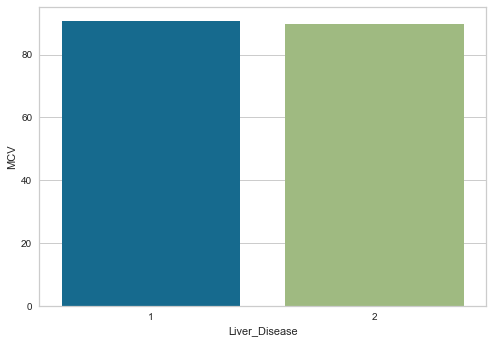

In [437]:
sns.barplot(y="MCV", x="Liver_Disease", data=newdf, ci= None)

<AxesSubplot:xlabel='Liver_Disease', ylabel='Alkphos'>

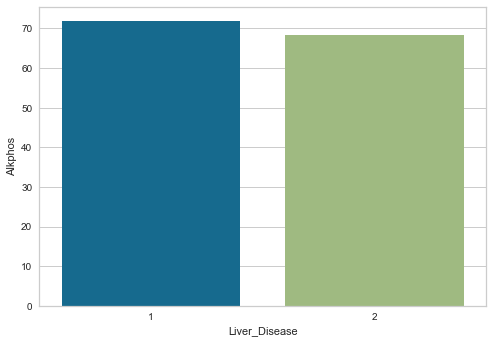

In [438]:
sns.barplot(y="Alkphos", x="Liver_Disease", data=newdf, ci= None)

<AxesSubplot:xlabel='Liver_Disease', ylabel='Sgpt'>

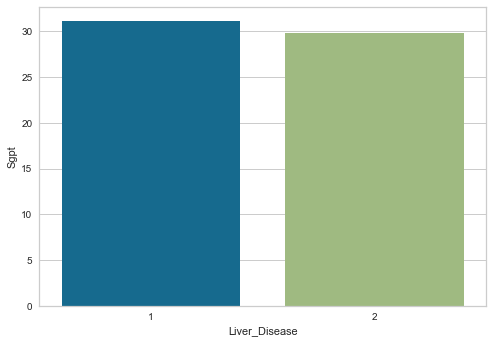

In [439]:
sns.barplot(y="Sgpt", x="Liver_Disease", data=newdf, ci= None)

<AxesSubplot:xlabel='Liver_Disease', ylabel='Sgot'>

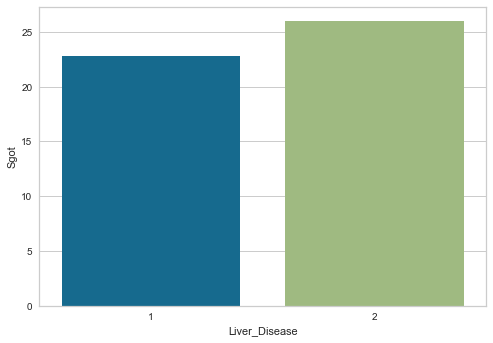

In [440]:
sns.barplot(y="Sgot", x="Liver_Disease", data=newdf, ci= None)

<AxesSubplot:xlabel='Liver_Disease', ylabel='Gammagt'>

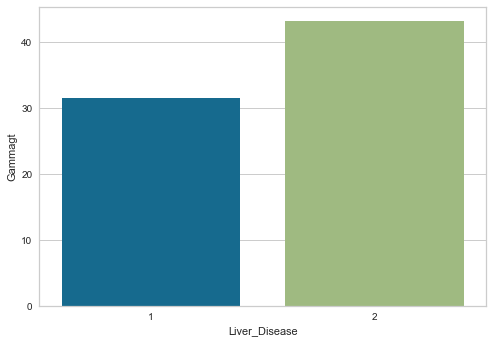

In [441]:
sns.barplot(y="Gammagt", x="Liver_Disease", data=newdf, ci= None)

<AxesSubplot:xlabel='Liver_Disease', ylabel='Drinks'>

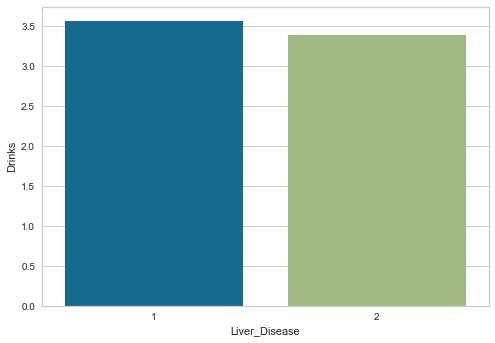

In [442]:
sns.barplot(y="Drinks", x="Liver_Disease", data=newdf, ci= None)

<AxesSubplot:>

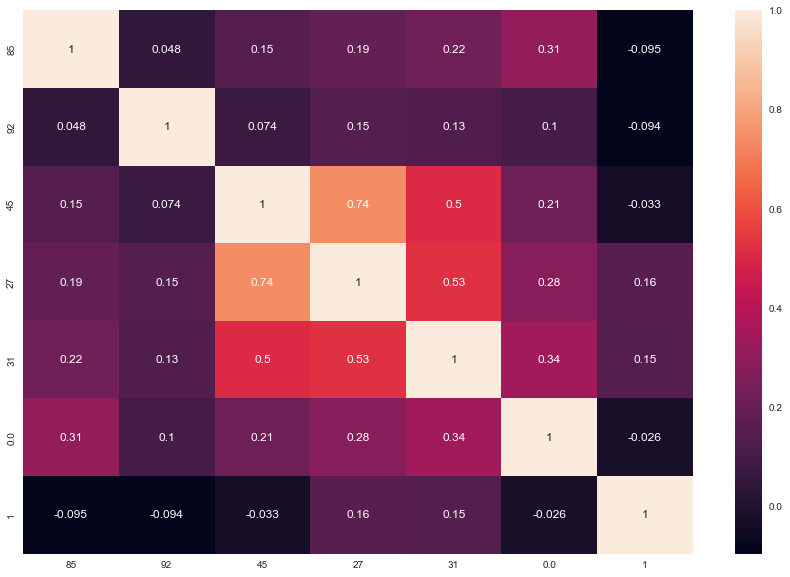

In [443]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot=True)

In [444]:
y= newdf["Liver_Disease"]
X= newdf.drop(columns = {"Liver_Disease"}, axis = 1)

In [445]:
sample = SMOTE(random_state = 45)
X,y = sample.fit_resample(X, y)


In [446]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size = 0.20, train_size = 0.80, random_state = 45) 

In [447]:
std_scale = MinMaxScaler() 
X_train_norm = pd.DataFrame(std_scale.fit_transform(X_train_))

In [448]:
X_train, X_test, y_train, y_test = train_test_split (X_train_norm, y_train_, test_size = 0.20, train_size = 0.80, random_state= 45)

In [449]:
y_test

9      1
48     2
287    2
270    1
106    1
      ..
265    2
134    2
244    1
226    2
36     2
Name: Liver_Disease, Length: 64, dtype: int64

In [450]:
pca = PCA(n_components= 6)
model = pca.fit(X_train)
PCA(n_components= 6)
print(model.explained_variance_ratio_)       

[0.37981534 0.21790036 0.16231681 0.13124037 0.07305952 0.0356676 ]


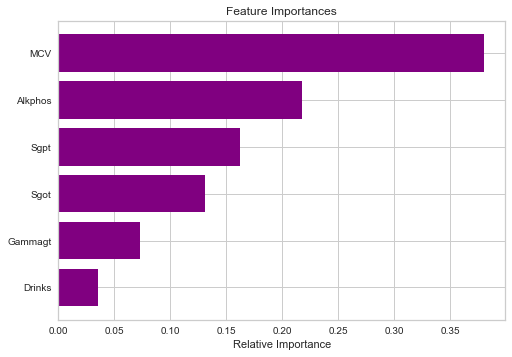

In [451]:
features = newdf.columns
importances = model.explained_variance_ratio_
indices = np.argsort(importances)[-6:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Text(0.5, 1.0, 'Elbow curve')

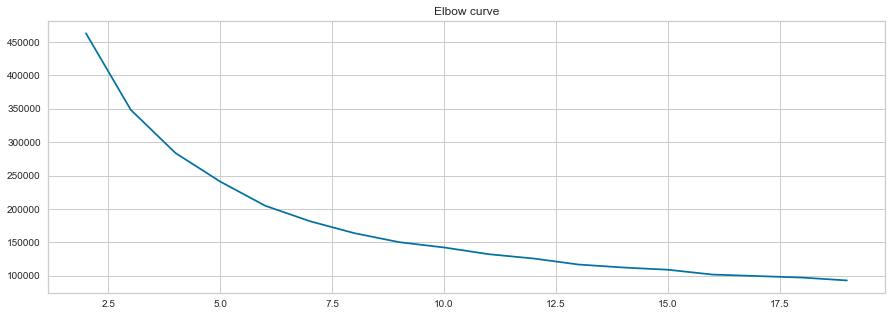

In [452]:
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

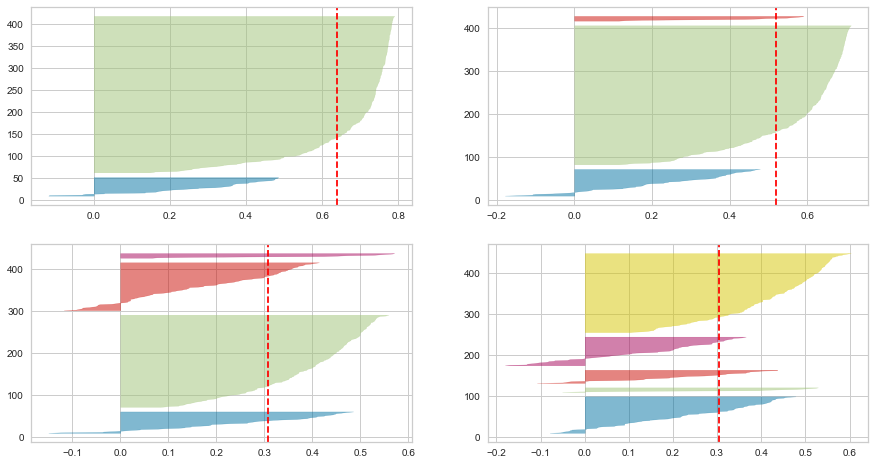

In [453]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=45)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)


In [454]:
model = KNeighborsClassifier(n_neighbors = 3)
mod = model.fit(X_train, y_train)

In [455]:
mode = mod.score(X_train, y_train)
mode

0.8515625

In [456]:
y_predict = mod.predict(X_test)

In [457]:
confusion_matrix(y_test, y_predict)

array([[20,  7],
       [14, 23]])

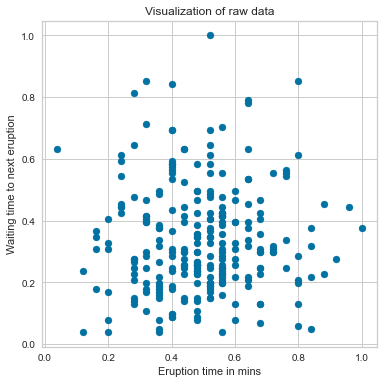

In [459]:
plt.figure(figsize=(6, 6))
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of raw data');

In [499]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [502]:
km = KMeans(n_clusters=3)
labels = km.fit_predict(X_train)
# centroids = km.cluster_centers_

In [503]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1])
plt.scatter(centroids = km.cluster_centers[:, 0], km.cluster_centers_[:, 1], c='red', s = 100)
plt.show()

SyntaxError: positional argument follows keyword argument (1658484234.py, line 3)